How many elements?


 2


Please type in the elements, press enter after type each element.


 Cr
 Te


The following PDOS files are being plotted.
['PDOS_Cr_DW.dat', 'PDOS_Cr_UP.dat', 'PDOS_Te_DW.dat', 'PDOS_Te_UP.dat']
Data read successfully!
X axis limit in eV, (positive value)


 3


Y axis limit in eV, (positive value)


 4


The projected density of states is saved as Figure_PDOS_Cr_Te.png


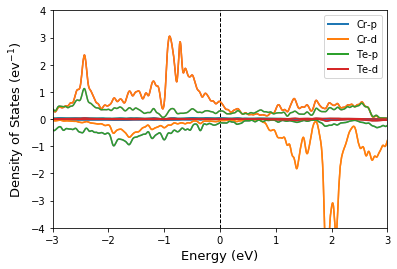

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

print("How many elements?")
num_elements = int(input())
elements_list = [' '] * num_elements
filenamelist = [""] * num_elements * 2 # Use this list to store filenames of PDOS.
print("Please type in the elements, press enter after type each element.")
for i in range(num_elements):
    element_name = input()
    elements_list[i] = element_name
    index = i*2
    filenamelist[index] = "PDOS_" + element_name + "_DW.dat"
    filenamelist[index+1] = "PDOS_" + element_name + "_UP.dat"
print("The following PDOS files are being plotted.")
print(filenamelist)
datalist = [""] * num_elements * 2
for i in range(len(datalist)):
    datalist[i] = pd.read_table(filenamelist[i], delim_whitespace = True)
    datalist[i]['d'] = datalist[i]['dxy'] + datalist[i]['dyz'] + datalist[i]['dz2'] + datalist[i]['dxz'] + datalist[i]['dx2']
    datalist[i]['p'] = datalist[i]['px'] + datalist[i]['py'] + datalist[i]['pz']
    datalist[i].to_csv(filenamelist[i] + ".csv")
for i in range(len(datalist)):
    plt.plot(datalist[i]['#Energy'], datalist[i]['p'])
    plt.plot(datalist[i]['#Energy'], datalist[i]['d'])
##   
print("Data read successfully!")

print("X axis limit in eV, (positive value)")
xlimit = float(input())
print("Y axis limit in eV, (positive value)")
ylimit = float(input())
colorlist = ['C0','C1','C2','C3','C4','C5','C6']


for i in range(len(datalist)):
    p_index = int(i)//2 *2 
    d_index = int(i)//2 *2 + 1
    p_color = colorlist[p_index]
    d_color = colorlist[d_index]
    plt.plot(datalist[i]['#Energy'], datalist[i]['p'],p_color)
    plt.plot(datalist[i]['#Energy'], datalist[i]['d'],d_color)
    plt.xlim(xmin = -xlimit, xmax = xlimit)
    plt.ylim(ymin = -ylimit, ymax = ylimit)
    plt.xlabel("Energy (eV)",fontsize=13)
    plt.ylabel("Density of States (ev$^{-1}$)",fontsize=13)
##
custom_lines = [' '] * num_elements * 2
for i in range(len(custom_lines)):
    custom_lines[i] = Line2D([0], [0], color = colorlist[i], lw = 2)

legend_list =[' '] * num_elements * 2
for i in range(len(legend_list)):
    if i%2==0:
        orbit = "-p"
    elif i%2==1:
        orbit = "-d"
    legend_list[i] = elements_list[i//2] + orbit
    
plt.legend(custom_lines, legend_list)
plt.vlines(0, -ylimit, ylimit, colors = "k", linestyles = "dashed", linewidth = 1)
figure_name = "Figure_PDOS"
for name in elements_list:
    figure_name = figure_name + "_" + name
print("The projected density of states is saved as " + figure_name + ".png")
plt.savefig(figure_name)
plt.show()
